In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import glob
import random
import string

In [2]:
BSDS = np.array([cv2.imread(file) for file in glob.glob("../data/BSDS300/images/train/*.jpg")])

In [3]:
print BSDS.shape
print BSDS[0].shape

(200,)
(481, 321, 3)


In [4]:
def gaussian_noise(img, stddev=25.0):
# def gaussian_noise(img, min_stddev=50.0, max_stddev=100.0): 
    
    noise_img = img.astype(np.float)
#     stddev = np.random.uniform(min_stddev, max_stddev)
    noise = np.random.randn(*img.shape) * stddev
    noise_img += noise
    noise_img = np.clip(noise_img, 0, 255).astype(np.uint8)
    
    return noise_img

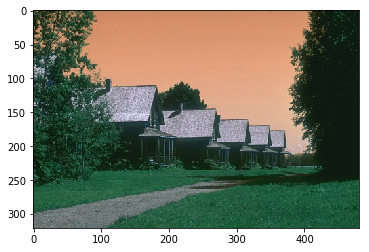

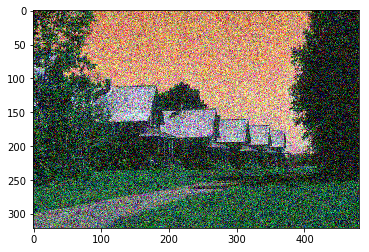

In [22]:
plt.imshow(BSDS[5])
plt.show()
plt.imshow(gaussian_noise(BSDS[5], 50.0))
plt.show()

In [7]:
def add_text(img, min_occupancy = 0.0, max_occupancy = 50.0):
    img = img.copy()
    h, w, _ = img.shape
    font = cv2.FONT_HERSHEY_SIMPLEX
    img_for_cnt = np.zeros((h, w), np.uint8)
    occupancy = np.random.uniform(min_occupancy, max_occupancy)

    while True:
        n = random.randint(5, 10)
        random_str = ''.join([random.choice(string.ascii_letters + string.digits) for i in range(n)])
        font_scale = np.random.uniform(0.5, 1)
        thickness = random.randint(1, 3)
        (fw, fh), baseline = cv2.getTextSize(random_str, font, font_scale, thickness)
        x = random.randint(0, max(0, w - 1 - fw))
        y = random.randint(fh, h - 1 - baseline)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.putText(img, random_str, (x, y), font, font_scale, color, thickness)
        cv2.putText(img_for_cnt, random_str, (x, y), font, font_scale, 255, thickness)

        if (img_for_cnt > 0).sum() > h * w * occupancy / 100:
            break
    return img

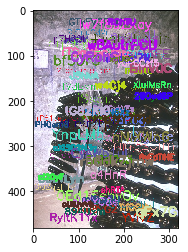

In [8]:
plt.imshow(add_text(BSDS[0]))

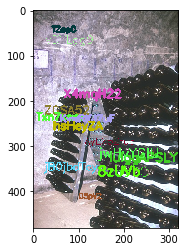

In [9]:
plt.imshow(add_text(BSDS[0]))

In [15]:
def add_impulse_noise(img, min_occupancy=0.0, max_occupancy=50.0):
    
    occupancy = np.random.uniform(min_occupancy, max_occupancy)
    mask = np.random.binomial(size=img.shape, n=1, p=occupancy / 100)
    noise = np.random.randint(256, size=img.shape)
    img = img * (1 - mask) + noise * mask
    
    return img.astype(np.uint8)

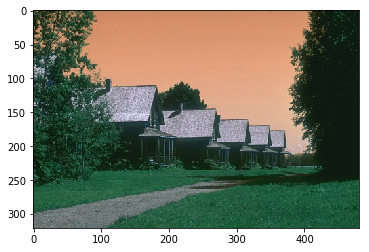

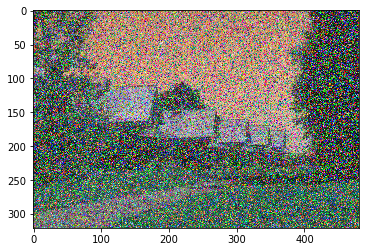

In [23]:
plt.imshow(BSDS[5])
plt.show()
plt.imshow(add_impulse_noise(BSDS[5]))
plt.show()